<h2 style="text-align:center;"> HELLENIC OPEN UNIVERSITY - SCHOOL OF SCIENCE AND TECHNOLOGY</h2>
<h2 style="text-align:center;"> DATA SCIENCE AND MACHINE LEARNING : DAMA61 </br> ACAD. YEAR 2024-25</h2>

<h3 style="text-align:center;"> WRITTEN ASSIGNMENT 1 - Solutions</h3>

<hr>

### Helpful configurations

In [1]:
# increase the width of the notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### Problem 1:

A very frequent problem in machine learning is predicting the value of a feature of an unknown set of samples, based on the remaining features with respect to a given dataset. This is performed by proper analysis of the predictors, i.e. the features that will be used as inputs to the model, and the labels which are the outputs of the model. An interesting use case, in these lines, is the estimation of the wine quality based on its characteristics. An available dataset containing information regarding several “white” and “red” wines can be obtained from https://archive.ics.uci.edu/static/public/186/wine+quality.zip. This assignment requires the design and implementation of an end-to-end machine learning solution that ad- heres to the following:

1) Open a Jupyter-notebook. Download the wines dataset and load the data of the “red” wines. <b>[5%]</b>
2) What are the features describing the quality of the wines? <b>[5%]</b>
3) Compute the descriptive statics of the dataset features and discuss about their types, ranges and completeness. <b>[5%]</b>
4) Form the histograms of the features and discuss their distribution. Can the distribution of some features be improved (tending more towards the Gaussian) and how? <b>[15%]</b>
5) Which are the features that mostly affect quality and which are those that affect it less? Provide evidence through correlation and discuss accordingly. <b>[15%]</b>
6) Split the dataset into a training and a testing set retaining 80% and 20% of the total number of samples, respectively, using random shuffling and splitting that retains the statistical properties of the input data (stratified) with respect to quality. <b>[20%]</b>
7) Scale the data with a Standard scaler and train a linear regression model. Evaluate the performance of the model, using the test set, with respect to metrics such as R2-score, Mean Absolute Error, Mean Absolute Percentage Error, Mean Squared Error and Accuracy. Comment on the accuracy of predictions by plotting Actuals vs Predicted diagram. <b>[20%]</b>
8) Perform 10-fold cross validation and compute the mean and standard deviation of the scores over the folds. Is the model’s R2-score within the limits defined by the 10-fold cross validation? <b>[15%]</b>

### Helpful imports

In [2]:
import pandas as pd
from pathlib import Path
import zipfile
import urllib.request

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

### Question 1

In [3]:
# Define function that downloads, unzips and loads the data based on type of wine ("red" or "white")
def load_wine_data(type_of_wine):
    zipfile_path = Path("datasets/wine+quality.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
        urllib.request.urlretrieve(url, zipfile_path)
        with zipfile.ZipFile(zipfile_path, "r") as wine_zip:
            wine_zip.extractall(path="datasets")
    return pd.read_csv(Path(f"datasets/winequality-{type_of_wine}.csv"),sep = ";")

In [4]:
# Load dataset
wine = load_wine_data("red")

In [5]:
# Check a few samples
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Question 2

In [6]:
# Get info around the variables
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### Comment:

In [7]:
print(f"The dataset includes {len(wine.keys())-1} input features, namely: {', '.join(k for k in wine.keys() if k not in ['quality'])}.")

The dataset includes 11 input features, namely: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol.


### Question 3

In [8]:
# Some descriptive statistics around the samples with respect to the features of the dataset
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Comment:

The dataset for “red” wine is composed of 1599 samples and has no missing data. The 11 input features are 64-bit floating point numbers, while the output is 64-bit integer. 

The range of most of the features is relatively small varying between 0 and 16, while the feature "free sulfur dioxide" takes values up to 72 and the feature "total sulfur dioxide" up to 289. These very different ranges can introduce unwanted bias in the model. This can be partially mitigated by proper scaling of the data.

### Question 4

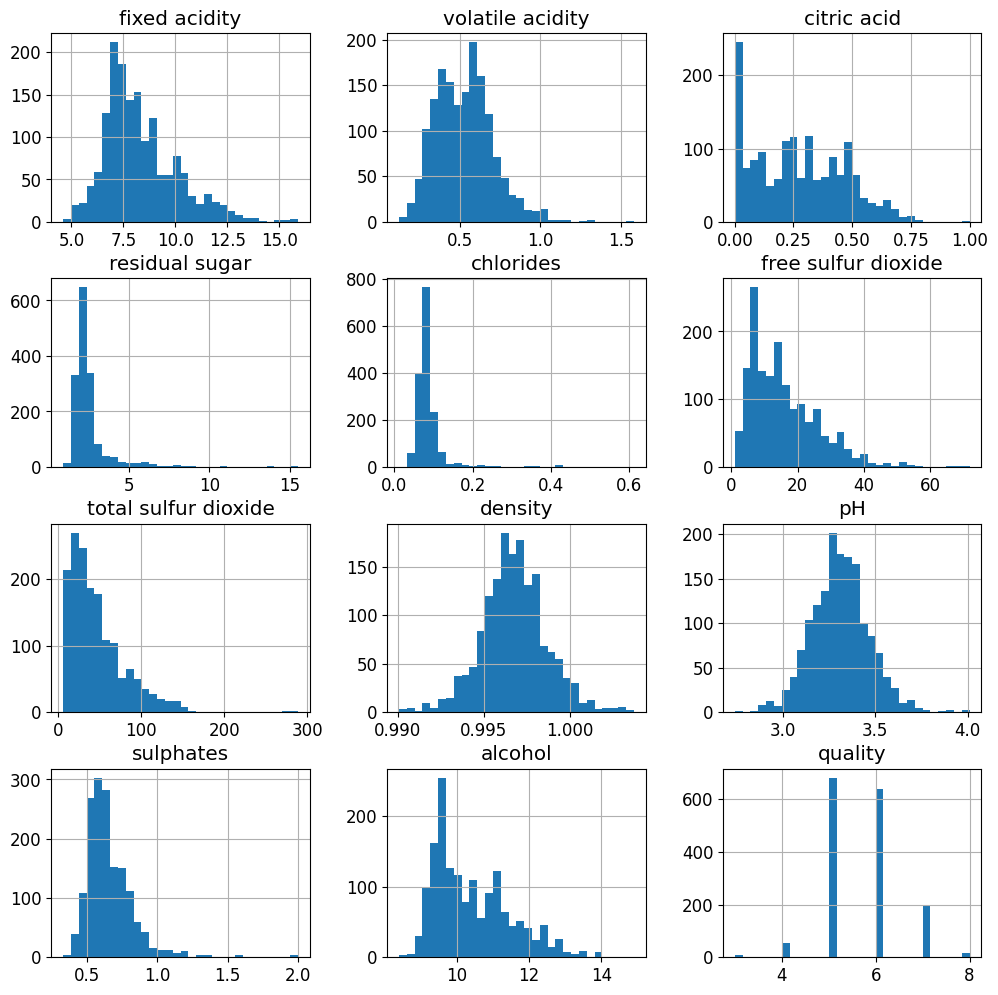

In [9]:
# Plot a histogram 
wine.hist(bins=30, figsize=(12, 12))
plt.show()

#### Comment:

By computing and visualizing the distribution of each feature, we observe that some features such as the “residual sugar”, “chorides”, “free sulfur dioxide”, “total sulfur dioxide” and “sulphates” have a right skewness (i.e., they do not follow a Gaussian distribution). This can be rectified by applying the log transform of these features. This is expected to improve accuracy of the model since it will render the transformed features closer to the Gaussian distribution.

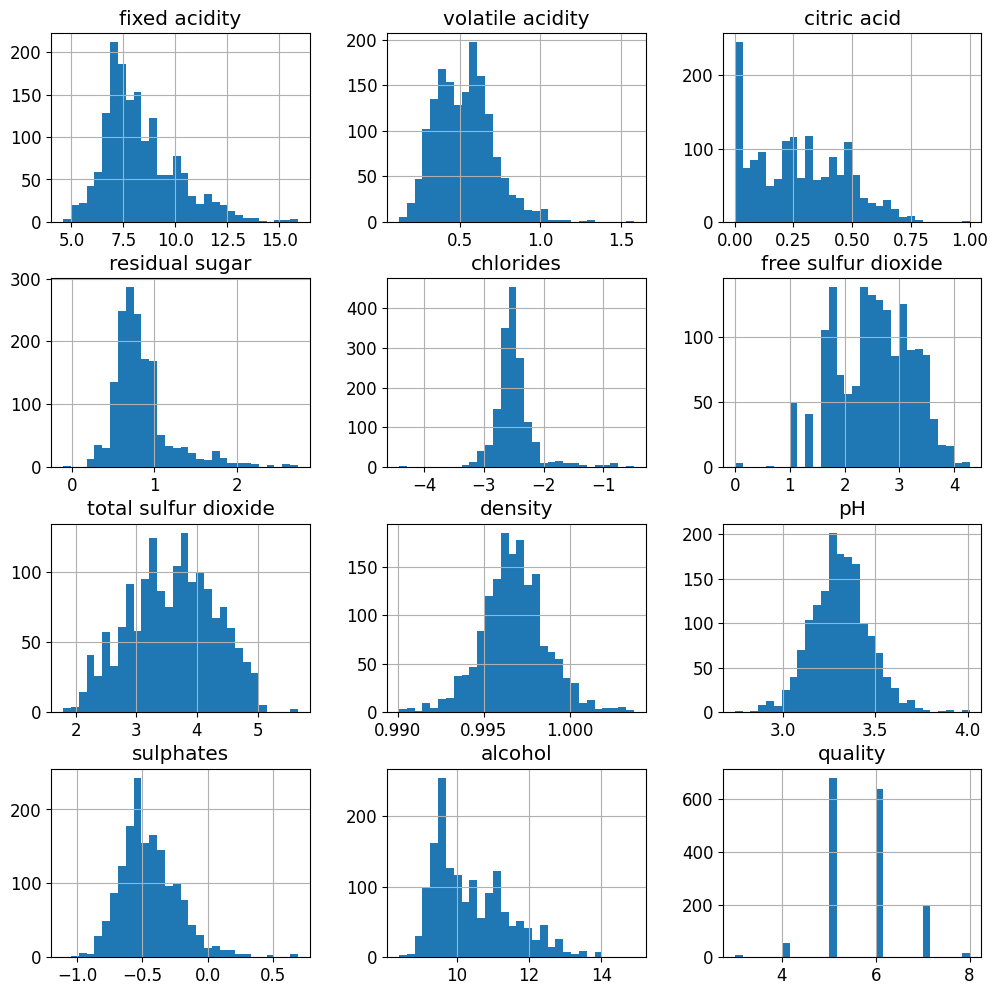

In [10]:
# Variable that controls the log transform
log_trans = True

if (log_trans):
    wine["residual sugar"] = np.log(wine["residual sugar"])
    wine["chlorides"] = np.log(wine["chlorides"])
    wine["free sulfur dioxide"] = np.log(wine["free sulfur dioxide"])
    wine["total sulfur dioxide"] = np.log(wine["total sulfur dioxide"])
    wine["sulphates"] = np.log(wine["sulphates"])

    wine.hist(bins=30, figsize=(12, 12))
    plt.show()

### Question 5

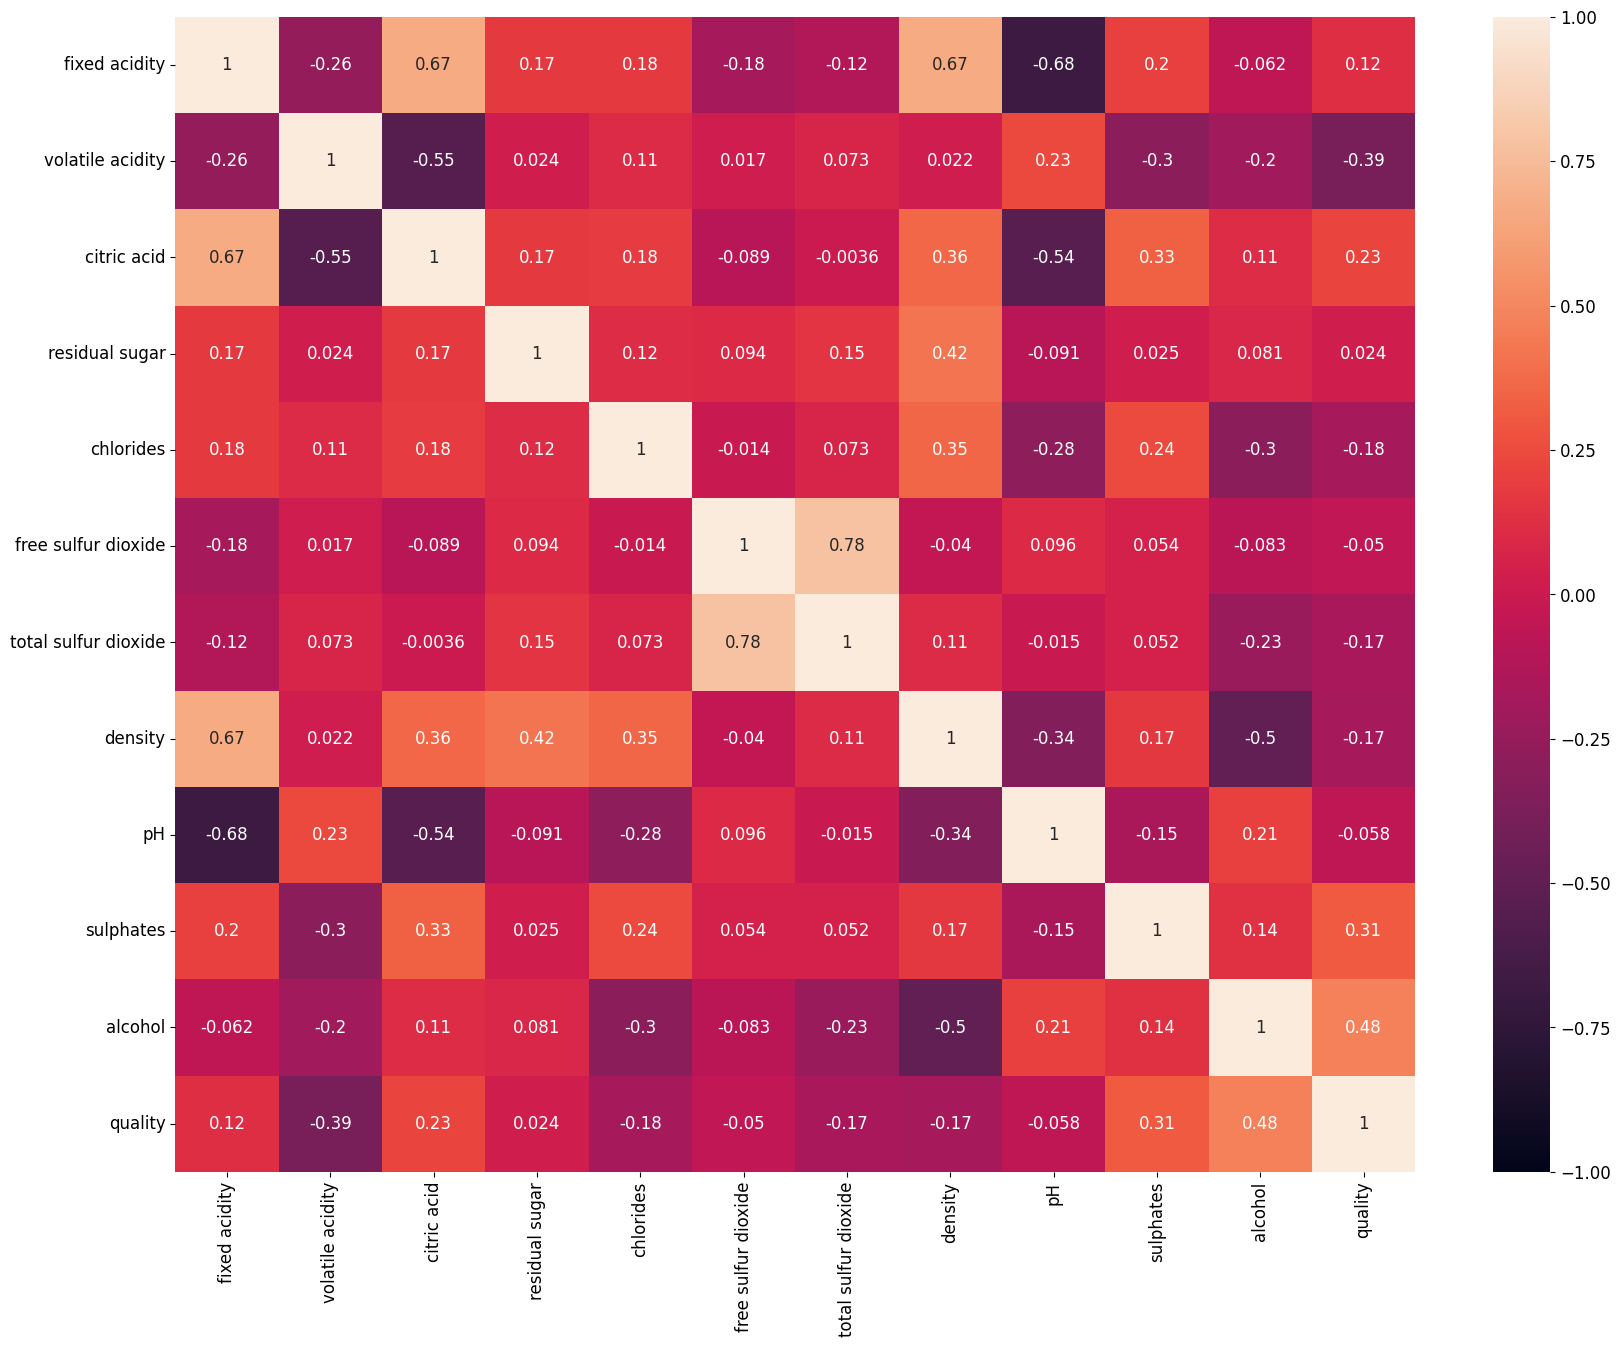

In [11]:
# A good indicator of the influence of a predictor to the output value is the correlation coefficient.

fig = plt.figure(figsize = (20,15))
sns.heatmap(wine.corr(), vmin = -1, vmax = 1, annot = True)
plt.show()

#### Comment:

From the heatmap it is evident that "alcohol", "sulphates" and "volatile acidity" are the features that mostly affect the quality of a wine, while, "residual sugar", "free sulfur dioxide" and "pH" are among those that affect it less.

### Question 6

In [12]:
# Split data in training and test sets based on the ratio between [0,1] of them 
# belonging to the test set
test_size = 0.2

# Split the dataset and fix random seed for reproducibility
from sklearn.model_selection import train_test_split

# Non-stratified spliting
train_set, test_set = train_test_split(wine, test_size=test_size, random_state=42)

In [13]:
print(f"Number of samples in training set: {len(train_set)}")
print(f"Number of samples in test set: {len(test_set)}")

Number of samples in training set: 1279
Number of samples in test set: 320


In [14]:
# Stratified splitting of the dataset
strat_train_set, strat_test_set = train_test_split(wine, test_size=test_size, stratify=wine["quality"], random_state=42)

In [15]:
print("Number of samples in training set (Stratisfied): ",len(train_set))
print("Number of samples in test set (Stratisfied): ",len(test_set))

Number of samples in training set (Stratisfied):  1279
Number of samples in test set (Stratisfied):  320


In [16]:
# Compare distribution of samples between random and stratified splitting
# with respect to population

def quality_proportions(data):
    return data["quality"].value_counts() / len(data)

compare_props = pd.DataFrame({"Overall %": quality_proportions(wine),
                              "Stratified %": quality_proportions(strat_test_set),
                              "Random %": quality_proportions(test_set)}).sort_index()

compare_props.index.name = "Quality"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] / compare_props["Overall %"] - 1)
compare_props["Rand. Error %"]  = (compare_props["Random %"] / compare_props["Overall %"] - 1)

compare_props = (100*compare_props).round(2)

compare_props

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Quality,,,,,
3,0.63,0.62,0.31,-0.06,-50.03
4,3.31,3.44,3.12,3.71,-5.72
5,42.59,42.50,40.62,-0.21,-4.61
6,39.90,40.00,41.25,0.25,3.38
7,12.45,12.50,13.12,0.44,5.46
8,1.13,0.94,1.56,-16.72,38.80


#### Comments:
From the above matrix it is evident that stratisfied splitting leads to preservation of the statistical distribution of samples included in the test set, with respect to the output, closer to that of the original dataset. The increase of error in the group corresponding to quality (8) is due to small number of samples in this category, where a small change results in large deviation of the percentage. It should be noted that because the random splitting is based on a seed variable it might lead to different results per execution if the seed variable is not fixed.

### Question 7

In [17]:
stratified_splitting = True

In [18]:
if stratified_splitting:
    train_set = strat_train_set
    test_set  = strat_test_set

In [19]:
x_train = train_set.drop("quality", axis=1).values
y_train = train_set["quality"].copy().values

x_test = test_set.drop("quality", axis=1).values
y_test = test_set["quality"].copy().values

In [20]:
from sklearn.preprocessing import StandardScaler

# Scale: Fit and transform the training set and apply the transformation to the test set
x_std_scaler = StandardScaler()
x_train_std_scaled = x_std_scaler.fit_transform(x_train)
x_test_std_scaled  = x_std_scaler.transform(x_test)

R^2-score is: 0.38103460074429873


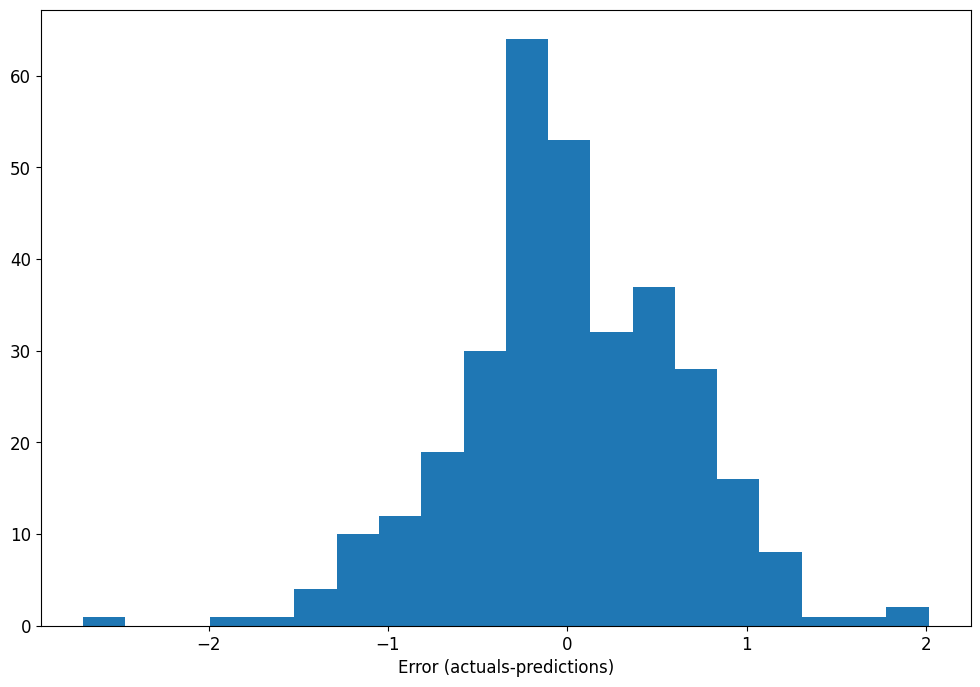

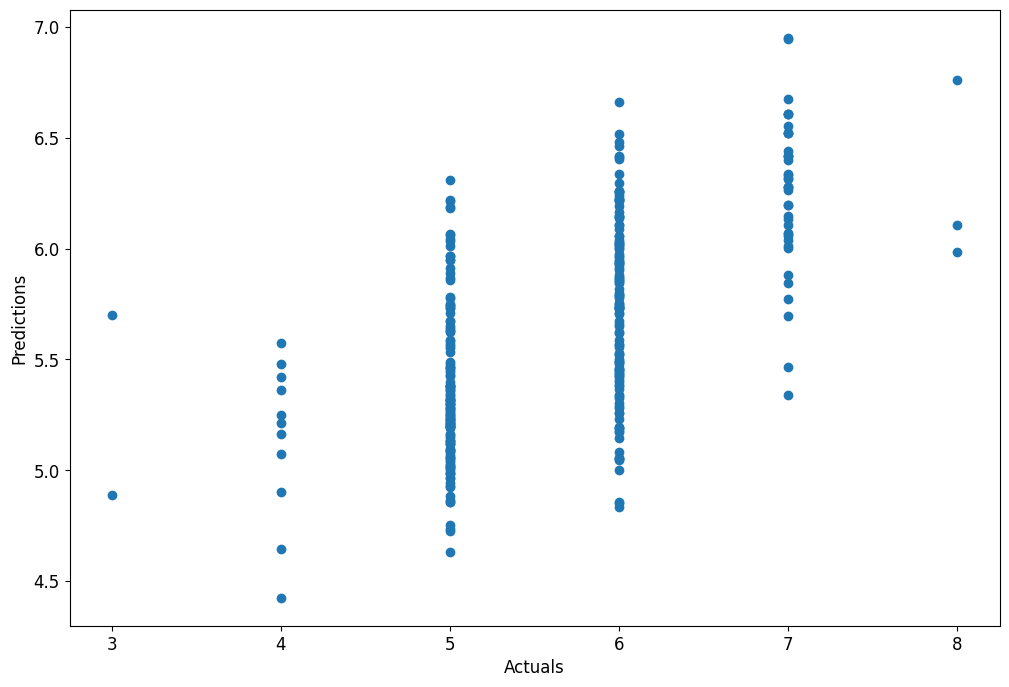

In [21]:
# Create and fit model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_std_scaled, y_train)

predictions = model.predict(x_test_std_scaled)

print(f"R^2-score is: {model.score(x_test_std_scaled, y_test)}")

# Histogram of the errors
fig = plt.figure( figsize = (12, 8))
plt.hist((y_test - np.transpose(predictions)), bins=20)
plt.xlabel("Error (actuals-predictions)")
plt.show()

# Scatter plot Actuals versus Preditions
fig = plt.figure( figsize = (12, 8))
plt.scatter(y_test, predictions)
plt.xlabel("Actuals")
plt.ylabel("Predictions")
plt.show()

#### Comment:

We observe that the actuals divert quite significantly from predictions. In the ideal case all points should be lying on a straight line. The difference between actuals and predictions can be quantified using the following error measures:

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, accuracy_score

print(f"MSE: {mean_squared_error(y_test, predictions):.4f}")
print(f"MAE: {mean_absolute_error(y_test, predictions):.4f}")
print(f"MAPE: {100*mean_absolute_percentage_error(y_test, predictions):.2f}%")
print(f"Accuracy Score: {100*accuracy_score(y_test, np.round(predictions)):.1f}%")

MSE: 0.3994
MAE: 0.4862
MAPE: 8.94%
Accuracy Score: 60.0%


#### Comment:

Despite the deviations on the diagram we see that the Mean Absolute Percentage Error is below 10% which is acceptable. The model achieves accuracy equal to 60%. Moreover, the average distance of the model, through MAE, is around 0.5 for our predictions.

It should be noted that the accuracy is computed through rounding of the predictions to the nearest integer.

### Question 8

A pipeline should be built, instead of using the scaled data as input, in order to avoid information "leakage" during formation of the different folds. A pipeline can be formed using either the "Pipeline" method, where naming of each stage is performed by the user or the "make_pipeline" method which automatically names the pipeline stages.

In [23]:
from sklearn.model_selection import KFold, cross_val_score 
from sklearn.pipeline import Pipeline

lin_reg = Pipeline([
    ("scaler", StandardScaler()),
    ("regressor", LinearRegression())
    ])

k_folds = KFold(n_splits = 10)
scores = cross_val_score(lin_reg, x_train, y_train, cv = k_folds) 

print(f"Cross Validation Scores: {[np.round(s, 4) for s in scores]}")
print(f"Average CV Score: {scores.mean():.4f}, with STD: {scores.std():.4f}")
print(f"Number of CV Scores used in Average: {len(scores)}")

Cross Validation Scores: [0.2128, 0.3442, 0.3982, 0.3994, 0.3025, 0.3859, 0.4542, 0.3521, 0.3782, 0.2263]
Average CV Score: 0.3454, with STD: 0.0734
Number of CV Scores used in Average: 10


#### Comments:

The computed R<sup>2</sup> score is withing the range defined by the average CV score and corresponding standard deviation. More specifically, it is very close to the average value (less than one sigma away). Thus, the splitting does not significantly affect the accuracy of the model with respect to input training data.

<hr>

### Problem 2:

Let's deep dive into the MNIST dataset, where you have to handle the next subqueries:

1) Load the data as arrays and split them into training and test sets with the next ratio: 85-15. Verify that all the classes have the adequate number of instances.<b>[15%]</b>
2) Depict the first 8 images of the created training and test sets using different subplots in a 2 by 4 frame, with their labels as titles. <b>[10%]</b>
3) We need to handle a classification problem of distinguishing between two classes: even and odd numbers. First, create the training and test subsets for each class. Then, choose a binary classifier and a normalization technique of your choice, before wrapping them into a scikit-learn pipeline. Fit your pipeline to observe the created diagram. <b>[25%]</b>
4) Use 3-fold cross validation and evaluate your classification pipeline by calculating the next metrics: accuracy, recall, and precision. Compare the predictive performance of your model against a dummy model that always guesses that an image belongs to the even category. <b>[20%]</b>
5) Calculate the confusion matrix for the training set, following the same 3-fold cross validation protocol. Record the kind and the amount of the predictions based on that.<b>[10%]</b>
6) Train the same pipeline over all the training set, and apply that on the test set for getting your predictions. Extract again the confusion matrix, and comment any great changes in the behavior of your model. <b>[15%]</b>
7) Pick one random instance from those that belong to false positives and false negatives from the test set, and depict their original images in separate figures.<b>[5%]</b>

### Helpful imports

In [24]:
# import the needed packages
import numpy as np
import pandas as pd
from collections import Counter

# set the output of sklearn pipelines 
from sklearn import set_config
set_config(display="diagram")

# set the plotting parameters
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

### Question 1

In [25]:
# load the MNIST dataset and check the keys of the mnist object
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [26]:
# observe categories of the dataset
mnist['categories']

{'class': ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']}

In [27]:
# split the data into features and target values
X, y = mnist["data"], mnist["target"]

In [28]:
# Verify that both X and y are numpy arrays
assert (type(X) == np.ndarray) & (type(y) == np.ndarray)

In [29]:
from sklearn.model_selection import train_test_split

# apply stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)

In [30]:
# observe the distribution of the labels in the training set
Counter(y_train)

Counter({'1': 6695,
         '7': 6199,
         '3': 6070,
         '2': 5942,
         '9': 5914,
         '0': 5868,
         '6': 5845,
         '8': 5801,
         '4': 5800,
         '5': 5366})

In [31]:
# observe the distribution of the labels in the test set
Counter(y_test)

Counter({'1': 1182,
         '7': 1094,
         '3': 1071,
         '2': 1048,
         '9': 1044,
         '0': 1035,
         '6': 1031,
         '8': 1024,
         '4': 1024,
         '5': 947})

### Question 2

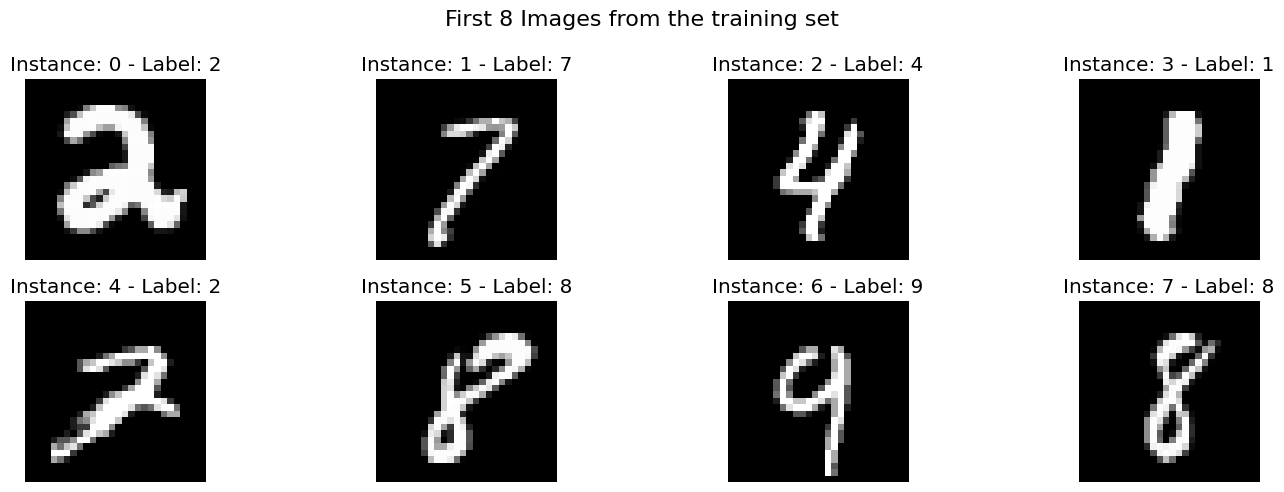

In [32]:
# Display the first 8 images from the training dataset

# Define the number of rows and columns for the subplot grid
num_rows = 2
num_cols = 4

# Create the subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Add a generic title to the entire subplot grid
fig.suptitle('First 8 Images from the training set', fontsize=16)

# Loop through the indices and display each image
ind = 0
for i in range(num_rows):
    for j in range(num_cols):
        axes[i,j].imshow(X_train[ind].reshape((28, 28)), cmap = "gray")
        axes[i,j].set_title(f"Instance: {ind} - Label: {y_train[ind]}")
        axes[i,j].axis('off')  # Hide the axis
        ind += 1

plt.tight_layout()
plt.show()

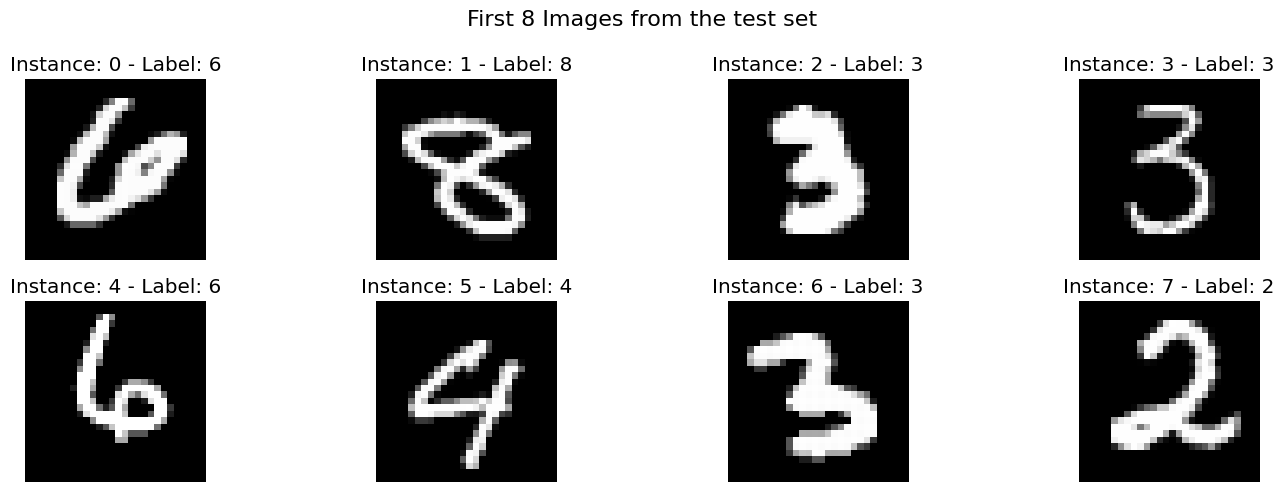

In [33]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5))

# Add a generic title to the entire subplot grid
fig.suptitle('First 8 Images from the test set', fontsize=16)

# Loop through the indices and display each image
ind = 0
for i in range(num_rows):
    for j in range(num_cols):
        axes[i,j].imshow(X_test[ind].reshape((28, 28)), cmap = "gray")
        axes[i,j].set_title(f"Instance: {ind} - Label: {y_test[ind]}")
        axes[i,j].axis('off')  # Hide the axis
        ind += 1

plt.tight_layout()
plt.show()

### Question 3

In [34]:
# create the asked even/odd target values (we need only one of them - here we proceed with the even numbers)
y_train_even = (np.isin(y_train, ['0', '2', '4', '6', '8']))
y_test_even  = (np.isin(y_test,  ['0', '2', '4', '6', '8']))

y_train_odd = (np.isin(y_train, ['1', '3', '5', '7', '9']))
y_test_odd  = (np.isin(y_test,  ['1', '3', '5', '7', '9']))

In [35]:
# check the shapes of the target values
y_train_even.shape, y_train_odd.shape, y_test_even.shape, y_test_odd.shape

((59500,), (59500,), (10500,), (10500,))

In [36]:
# create a classification pipeline choosing SGD classifier having first standardized the data
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

sgd_clf = make_pipeline(StandardScaler(),
                        SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))

sgd_clf.fit(X_train, y_train_even)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

### Question 4

In [37]:
# calculate the accuracy, recall and precision of the training set
from sklearn.model_selection import cross_validate

scores = cross_validate(sgd_clf, X_train, y_train_even, cv=3,
                        scoring=['accuracy', 'recall', 'precision'])

In [38]:
print(f"Accuracy of each  fold: {scores['test_accuracy']}, mean  accuracy: {100*scores['test_accuracy'].mean():.1f}%")
print(f"Recall  of  each  fold: {scores['test_recall']}, mean    recall: {100*scores['test_recall'].mean():.1f}%")
print(f"Precision of each fold: {scores['test_precision']}, mean precision: {100*scores['test_precision'].mean():.1f}%")

Accuracy of each  fold: [0.88086115 0.88977966 0.87914083], mean  accuracy: 88.3%
Recall  of  each  fold: [0.86556604 0.89007383 0.87448728], mean    recall: 87.7%
Precision of each fold: [0.8891815  0.88625689 0.87908463], mean precision: 88.5%


In [39]:
# a dummy model that always guesses even can be modeled by creating a vector with True values
# for all the training instances
dummy_predictions = np.ones(len(y_train_even), dtype=bool) # or np.ones_like(y_train_even)

# verify that we have only True values in the dummy_predictions
Counter(dummy_predictions)

Counter({True: 59500})

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Compute accuracy, precision, and recall of the dummy approach
accuracy = accuracy_score(y_train_even, dummy_predictions)
precision = precision_score(y_train_even, dummy_predictions)
recall = recall_score(y_train_even, dummy_predictions)

print(f"Accuracy  of a model that always guesses even:  {100 * accuracy:.1f}%")
print(f"Precision of a model that always guesses even:  {100 * precision:.1f}%")
print(f"Recall  of a  model that always  guesses even: {100 * recall:.1f}%")

Accuracy  of a model that always guesses even:  49.2%
Precision of a model that always guesses even:  49.2%
Recall  of a  model that always  guesses even: 100.0%


#### Comment:

The performance of the SGD classification model clearly outperforms that of the dummy model, which always guesses that an image contains an even number. This was the expected behavior, as the former model learns patterns from the training data that characterize each class. In contrast, the behavior of the dummy model depends on the distribution of the training set.</br>

This example demonstrates that when evaluating predictive models, it is crucial to consider the distribution of the dataset and be cautious when examining performance metrics individually. Specifically, the dummy model has a perfect recall score here, but its overall performance is poor, as it follows a simple rule: predict everything as even. While it is reasonable to have perfect recall for the even class, its usability is limited.</br>


### Question 5

In [41]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_even, cv=3)
confusion_matrix(y_train_even, y_train_pred)

array([[26905,  3339],
       [ 3607, 25649]])

#### Comment:
The confusion matrix shows that the model made:
- 26,905 correct negative (TN) predictions,
- 3,339 false positive (FP) predictions,
- 3,607 false negative (FN) predictions, and
- 25,649 correct positive (TP) predictions.

### Question 6

In [42]:
# recall that the sgf_clf component has not changed
sgd_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [43]:
# train the model on the entire training set and compute the confusion matrix on the test set
sgd_clf.fit(X_train, y_train_even)
y_test_pred = sgd_clf.predict(X_test)

confusion_matrix(y_test_even, y_test_pred)

array([[4766,  572],
       [ 572, 4590]])

In [44]:
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_even, y_train_pred).ravel()
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test_even, y_test_pred).ravel()

tn_train_pct = (tn_train / len(y_train)) * 100
fp_train_pct = (fp_train / len(y_train)) * 100
fn_train_pct = (fn_train / len(y_train)) * 100
tp_train_pct = (tp_train / len(y_train)) * 100

# Print percentage values of the results of the training and the test set
print(f"Training Set:")
print(f"True Negatives  (TN): {tn_train:5d} ({tn_train_pct:5.2f}%)")
print(f"False Positives (FP): {fp_train:5d} ({fp_train_pct:5.2f}%)")
print(f"False Negatives (FN): {fn_train:5d} ({fn_train_pct:5.2f}%)")
print(f"True Positives  (TP): {tp_train:5d} ({tp_train_pct:5.2f}%)")

tn_test_pct = (tn_test / len(y_test)) * 100
fp_test_pct = (fp_test / len(y_test)) * 100
fn_test_pct = (fn_test / len(y_test)) * 100
tp_test_pct = (tp_test / len(y_test)) * 100

print(f"\nTest Set:")
print(f"True Negatives  (TN): {tn_test:5d} ({tn_test_pct:5.2f}%)")
print(f"False Positives (FP): {fp_test:5d} ({fp_test_pct:5.2f}%)")
print(f"False Negatives (FN): {fn_test:5d} ({fn_test_pct:5.2f}%)")
print(f"True Positives  (TP): {tp_test:5d} ({tp_test_pct:5.2f}%)")

Training Set:
True Negatives  (TN): 26905 (45.22%)
False Positives (FP):  3339 ( 5.61%)
False Negatives (FN):  3607 ( 6.06%)
True Positives  (TP): 25649 (43.11%)

Test Set:
True Negatives  (TN):  4766 (45.39%)
False Positives (FP):   572 ( 5.45%)
False Negatives (FN):   572 ( 5.45%)
True Positives  (TP):  4590 (43.71%)


#### Comment:
The distribution of the correct and false predictions across the 2 labels look pretty same.

### Question 7

In [45]:
# define the indices of the false negatives and false positives predictions on the test set
indices_fn = (y_test_even == True) & (y_test_pred == False)
indices_fp = (y_test_even == False) & (y_test_pred == True)

indices_fn.shape, indices_fp.shape

((10500,), (10500,))

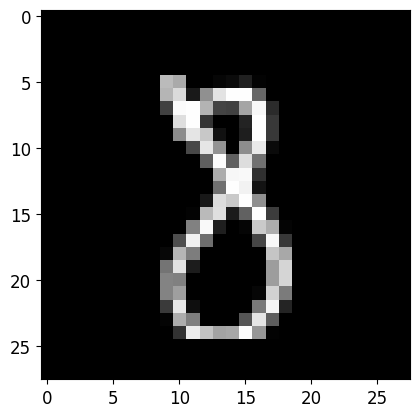

Predected as an even number: False


In [46]:
# display a digit that belongs to even numbers but was predicted as odd
ind = 15
plt.imshow(X_test[indices_fn][ind].reshape(28,28), cmap = "gray")
plt.show()
print(f"Predected as an even number: {y_test_pred[indices_fn][ind]}")

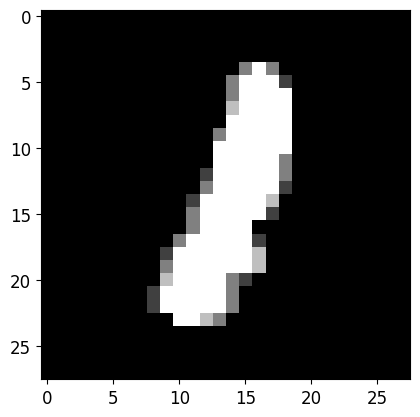

Predected as an even number: True


In [47]:
# display a digit that belongs to odd numbers but was predicted as even
ind = 15
plt.imshow(X_test[indices_fp][ind].reshape(28,28), cmap = "gray")
plt.show()
print(f"Predected as an even number: {y_test_pred[indices_fp][ind]}")